In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
import numpy as np
import IPython.display as ipd


In [2]:
filepath = "audio1.wav"
ipd.Audio(filepath)

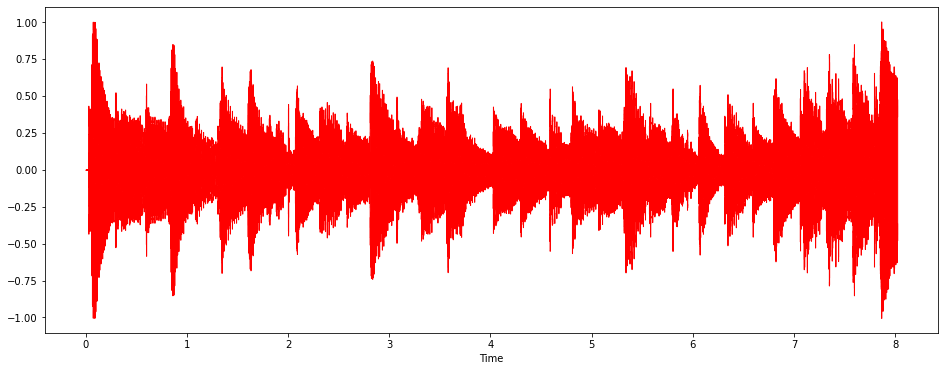

In [3]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate,color='red')

In [4]:
filepath = "audio2.wav"
ipd.Audio(filepath)

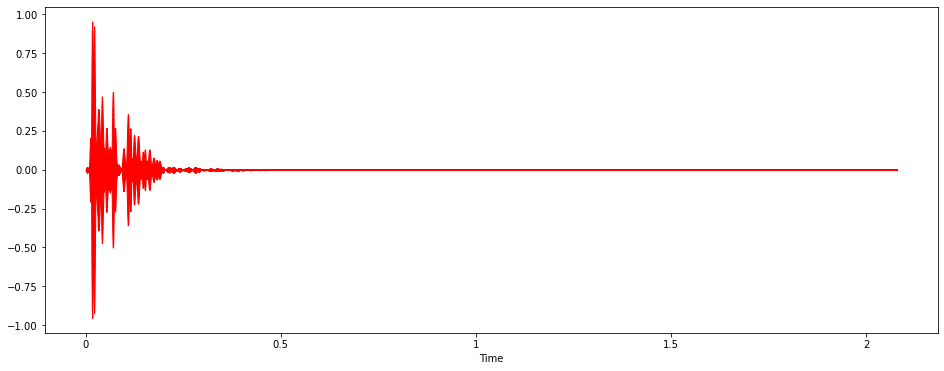

In [5]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

In [6]:
filepath = "audio3.wav"
ipd.Audio(filepath)

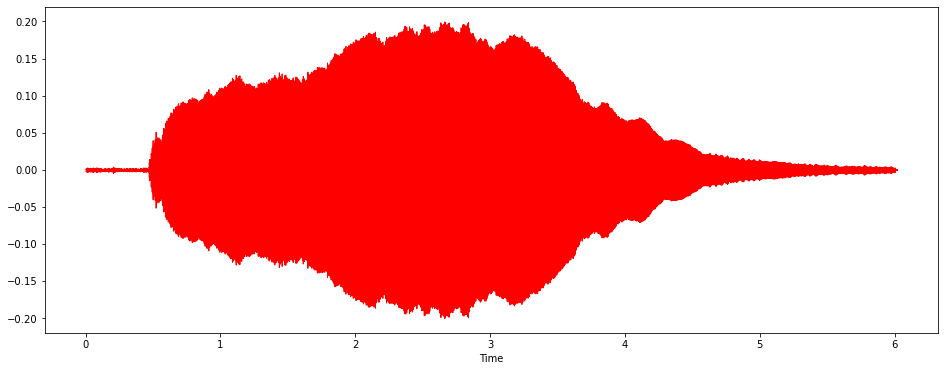

In [7]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate,color='red')

In [8]:
filepath = "record.wav"
ipd.Audio(filepath)

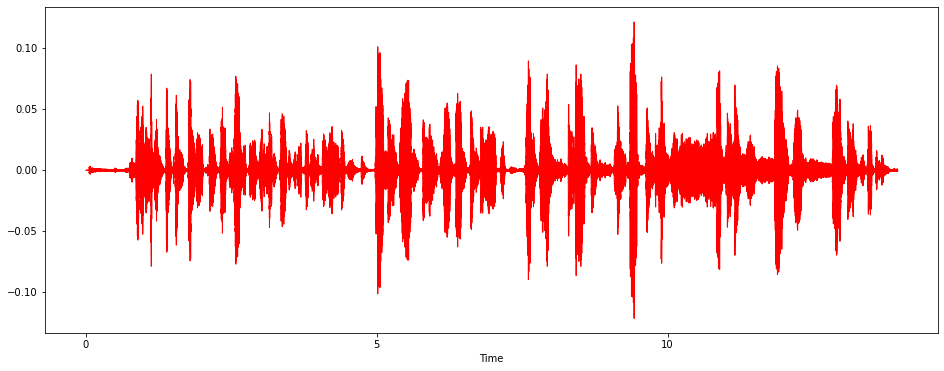

In [9]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

In [10]:
import pydub
from pydub import AudioSegment
t1 = 1 * 1000  
t2 = 2 * 2000
newAudio = AudioSegment.from_wav("record.wav")
newAudio = newAudio[t1:t2]
newAudio.export('new_record.wav', format="wav")

C:\Users\H\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='new_record.wav'>

In [11]:
filepath = "new_record.wav"
ipd.Audio(filepath)

In [12]:
import wave

infiles = ["audio1.wav", "record.wav"]
outfile = "new_audio.wav"

data= []
for infile in infiles:
    w = wave.open(infile, 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()
    
output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
for i in range(len(data)):
    output.writeframes(data[i][1])
output.close()

In [13]:
filepath = "new_audio.wav"
ipd.Audio(filepath)

In [14]:
sound1 = AudioSegment.from_file("audio1.wav")
sound2 = AudioSegment.from_file("record.wav")

combined = sound1.overlay(sound2)

combined.export("mixing_audio.wav", format='wav')

<_io.BufferedRandom name='mixing_audio.wav'>

In [15]:
filepath = "mixing_audio.wav"
ipd.Audio(filepath)

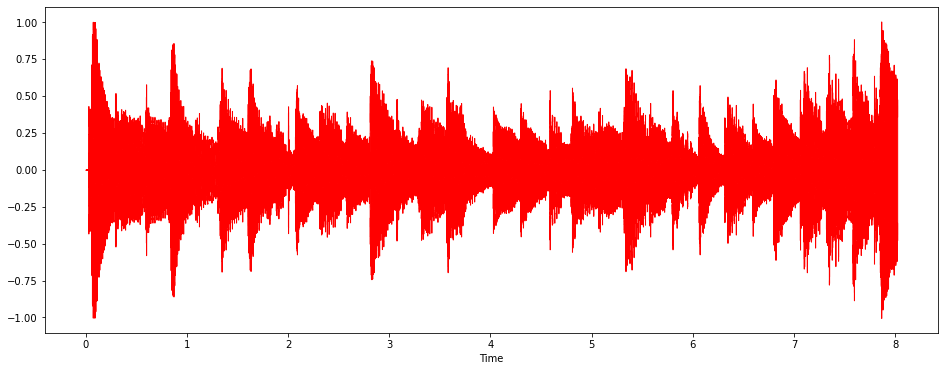

In [16]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

C:\Users\H\AppData\Local\Temp\ipykernel_9992\502676612.py:7: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


Text(0, 0.5, 'Amplitude')

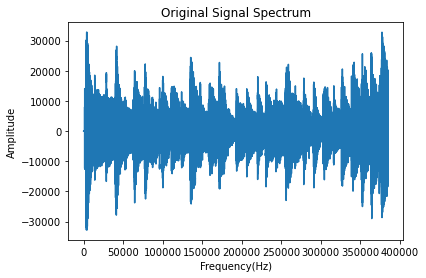

In [19]:
import numpy as np  
import scipy as sp  
from scipy.io.wavfile import read  
from scipy.io.wavfile import write     
from scipy import signal  
import matplotlib.pyplot as plt  
get_ipython().magic('matplotlib inline')  

(Frequency, array) = read('mixing_audio.wav')  

len(array)  

plt.plot(array)   
plt.title('Original Signal Spectrum')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  



In [22]:
FourierTransformation = sp.fft(array)  

scale = sp.linspace(0, Frequency, len(array))  

plt.stem(scale[0:5000], np.abs(FourierTransformation[0:5000]), 'r')    
plt.title('Signal spectrum after FFT')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  


GuassianNoise = np.random.rand(len(FourierTransformation))  


NewSound = GuassianNoise + array  

write("New-Sound-Added-With-Guassian-Noise.wav", Frequency, NewSound)  

b,a = signal.butter(5, 1000/(Frequency/2), btype='highpass')  

filteredSignal = signal.lfilter(b,a,NewSound)  
plt.plot(filteredSignal) # plotting the signal.  
plt.title('Highpass Filter')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  


c,d = signal.butter(5, 380/(Frequency/2), btype='lowpass') # ButterWorth low-filter  
newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal  
plt.plot(newFilteredSignal) # plotting the signal.  
plt.title('Lowpass Filter')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

write("New-Filtered-Sound.wav", Frequency, newFilteredSignal)

TypeError: 'module' object is not callable